In [2]:
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
sample_dir = data_path / 'MEG' / 'sample'
raw_fname = sample_dir / 'sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path / 'subjects'
subject = 'fsaverage' # change it to use freesurfer's bem

In [2]:
forward = mne.read_forward_solution('sample_fsaverage_manual_all327684_fwd.fif',verbose=None)

Reading forward solution from /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/sample_fsaverage_manual_all327684_fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (327684 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [ ]:
forward = mne.read_forward_solution('sample_fsaverage_fwd.fif',verbose=None)

In [ ]:
forward

In [ ]:
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
sample_dir = data_path / 'MEG' / 'sample'
raw_fname = sample_dir / 'sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path / 'subjects'
subject = 'fsaverage' # change it to use freesurfer's bem

In [5]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
import mne
# sample_data_raw_file='C:/Users/zhouz\Downloads/CC110033/rest/rest_raw.fif'
sample_data_raw_file='C:/Users/zhouz\Downloads/CC110033/task/task_raw.fif'
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()

Opening raw data file C:/Users/zhouz\Downloads/CC110033/task/task_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 16000 ... 557999 =     16.000 ...   557.999 secs
Ready.
Reading 0 ... 60000  =      0.000 ...    60.000 secs...


<Raw | task_raw.fif, 339 x 60001 (60.0 s), ~161.6 MB, data loaded>

In [6]:
raw.plot()

Effective window size : 2.048 (s)


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


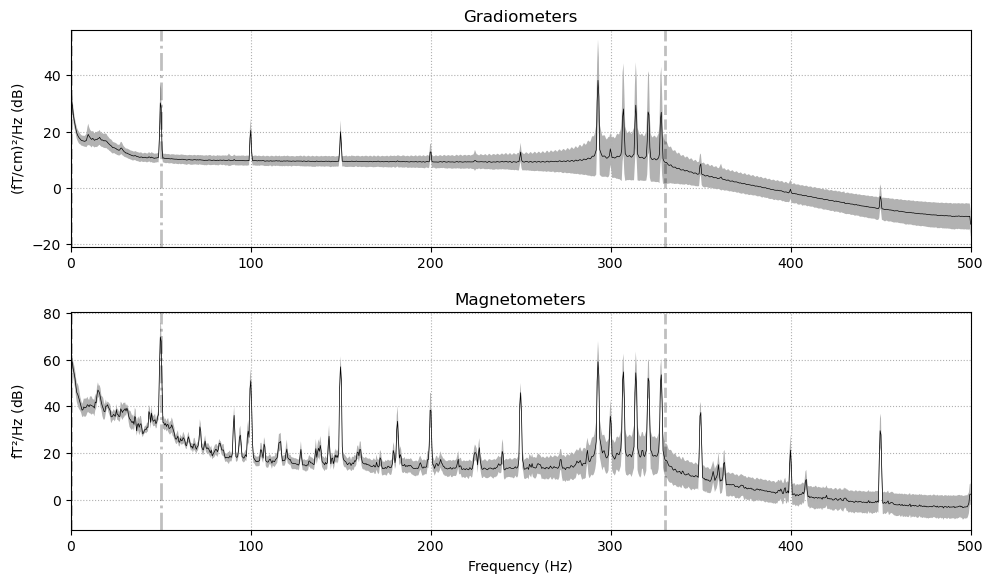

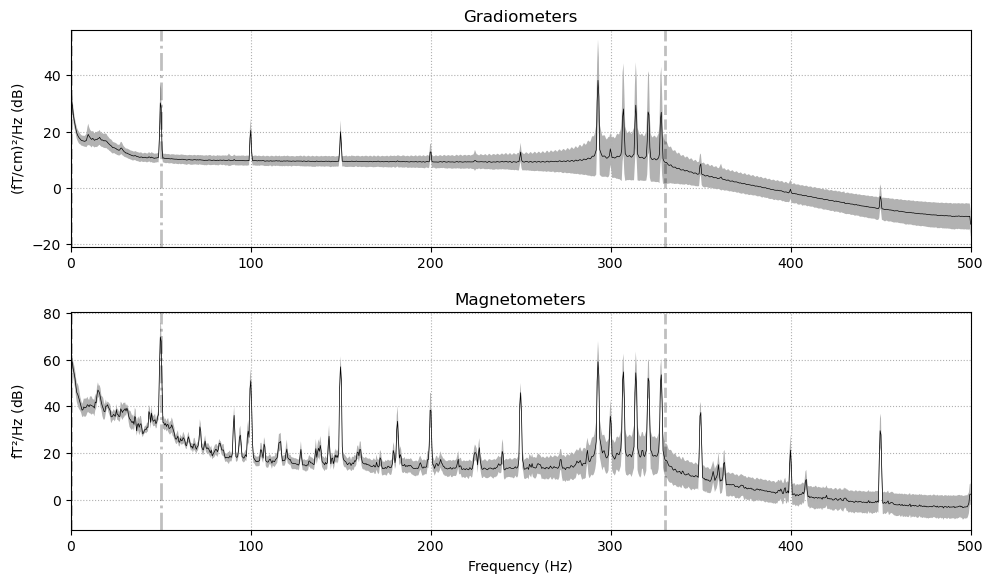

In [4]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

In [7]:
events = mne.find_events(raw, stim_channel="STI001")

7 events found
Event IDs: [5]


In [8]:
event_dict = {"auditory/left": 5}
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)
evoked = epochs["auditory/left"].average()

Not setting metadata
7 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Using data from preloaded Raw for 7 events and 1001 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [19]:
mne.write_evokeds('evoked-ave.fif', evoked, on_mismatch='raise', overwrite=False, verbose=None)

In [20]:
raw_empty_room=raw
raw_empty_room.info["bads"]

[]

In [21]:
raw_empty_room.info["bads"] = [bb for bb in raw.info["bads"] if "EEG" not in bb]

In [22]:
raw_empty_room.info["bads"] 

[]

In [23]:
raw.info["projs"]

[<Projection | mag_ssp_upright.fif : PCA-mags-v1, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v2, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v3, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v4, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v5, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v1, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v2, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v3, active : False, n_channels : 306>]

In [24]:
raw_empty_room.add_proj(
    [pp.copy() for pp in raw.info["projs"] if "EEG" not in pp["desc"]]
)

8 projection items deactivated


<Raw | task_raw.fif, 339 x 60001 (60.0 s), ~161.6 MB, data loaded>

In [25]:
noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=0, tmax=None)

Using up to 300 segments
Number of samples used : 60000
[done]


In [27]:
noise_cov_baseline = mne.compute_covariance(epochs, tmax=0)

Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 306 dim * 9.7e+06  max singular value)
    Estimated rank (mag + grad): 298
    MEG: rank 298 computed from 306 data channels with 8 projectors
    Created an SSP operator (subspace dimension = 8)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 306 -> 298
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2107
[done]


    Created an SSP operator (subspace dimension = 8)
Computing rank from covariance with rank=None
    Using tolerance 6e-10 (2.2e-16 eps * 102 dim * 2.7e+04  max singular value)
    Estimated rank (mag): 97
    MAG: rank 97 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 9.5e-09 (2.2e-16 eps * 204 dim * 2.1e+05  max singular value)
    Estimated rank (grad): 201
    GRAD: rank 201 computed from 204 data channels with 0 projectors


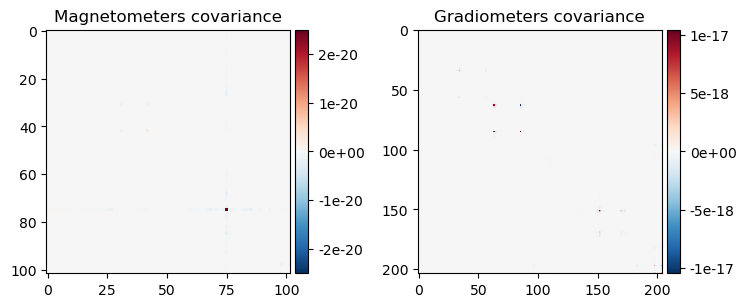

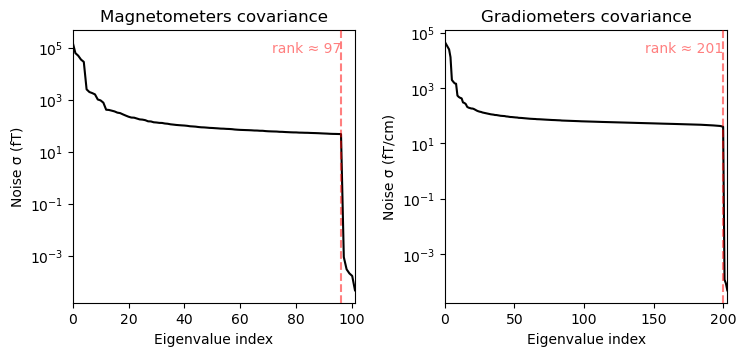

    Created an SSP operator (subspace dimension = 8)
Computing rank from covariance with rank=None
    Using tolerance 9.5e-10 (2.2e-16 eps * 102 dim * 4.2e+04  max singular value)
    Estimated rank (mag): 97
    MAG: rank 97 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 1.5e-08 (2.2e-16 eps * 204 dim * 3.3e+05  max singular value)
    Estimated rank (grad): 201
    GRAD: rank 201 computed from 204 data channels with 0 projectors


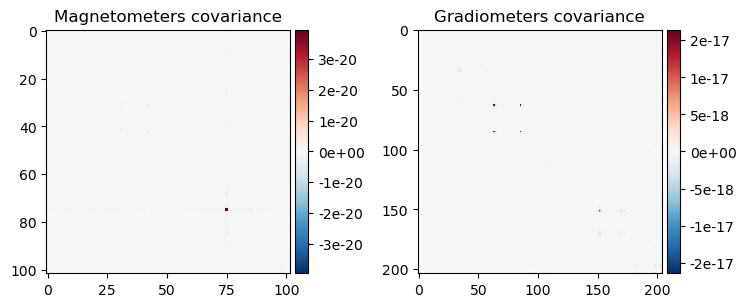

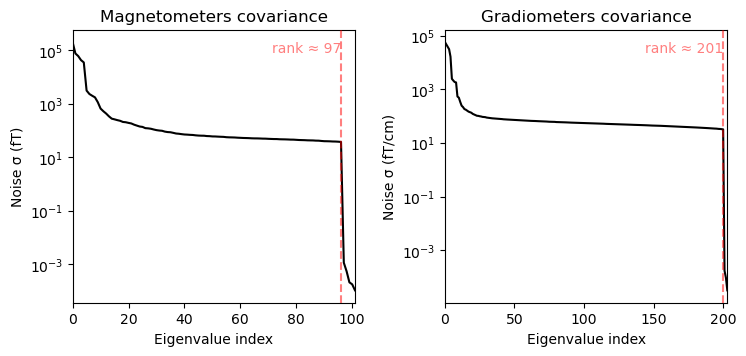

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [28]:
noise_cov.plot(raw_empty_room.info, proj=True)
noise_cov_baseline.plot(epochs.info, proj=True)

In [30]:
mne.write_cov('CAMCAN-cov.fif', noise_cov, overwrite=False, verbose=None)